<a href="https://colab.research.google.com/github/HaseebHussainMd/Projects/blob/main/Sales_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Transactions**

***Data Overview***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('Data Source (sales_transactions).csv')

In [ ]:
df.shape #Number of rows and columns

(50, 11)

We have 50 rows and 11 columns in our dataset

In [ ]:
df.info() #Column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    50 non-null     int64  
 1   CustomerID       45 non-null     float64
 2   TransactionDate  49 non-null     object 
 3   ProductID        50 non-null     int64  
 4   ProductCategory  50 non-null     object 
 5   Quantity         50 non-null     int64  
 6   PricePerUnit     36 non-null     float64
 7   TotalAmount      36 non-null     float64
 8   TrustPointsUsed  50 non-null     int64  
 9   PaymentMethod    40 non-null     object 
 10  DiscountApplied  45 non-null     float64
dtypes: float64(4), int64(4), object(3)
memory usage: 4.4+ KB






1.   TransactionDate is stored as object but should be converted to a datetime format.
2.   CustomerID is stored as float but should be converted to object format.



In [ ]:
df.isna().sum().sort_values(ascending=False) #Checking for missing values

,0
PricePerUnit,14
TotalAmount,14
PaymentMethod,10
CustomerID,5
DiscountApplied,5
TransactionDate,1
TransactionID,0
ProductID,0
ProductCategory,0
Quantity,0


The dataset contains several missing values in CustomerID, TransactionDate, PricePerUnit, TotalAmount, PaymentMethod, and DiscountApplied. These will need to be addressed during preprocessing.

In [ ]:
df.head(10)

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,8/8/2024,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,7/8/2024,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,2/8/2024,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,7/8/2024,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,9/8/2024,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0
5,6,1001.0,NaN,2007,Home Decor,1,NaN,NaN,20,Credit Card,NaN
6,7,1001.0,1/8/2024,2007,Home Decor,-1,30.0,-30.0,-10,NaN,NaN
7,8,1005.0,4/8/2024,2006,Toys,1,50.0,50.0,-10,Trust Points,30.0
8,9,1004.0,2/8/2024,2008,Fashion,1,NaN,NaN,-10,NaN,NaN
9,10,1004.0,1/8/2024,2005,Fashion,2,500.0,1000.0,-10,Cash,30.0


TotalAmount should logically be (Quantity * PricePerUnit) - DiscountApplied. We need to validate these fields to ensure data integrity.

**Data Preprocessing**

**Handling Missing Values:**

1. Most number of missing values are in PricePerUnit and TotalAmount.If we fill missing values in PricePerUnit then we can calculate TotalAmount based on PricePerUnit and Quantity.
2.We can fetch PricePerUnit based on ProductId available in other records of data.

In [ ]:
df[['ProductID','ProductCategory','PricePerUnit']].sort_values(by='ProductID')

,ProductID,ProductCategory,PricePerUnit
16,2001,Toys,NaN
30,2001,Home Decor,NaN
22,2001,Electronics,30.0
3,2001,Toys,30.0
41,2001,Electronics,50.0
34,2002,Electronics,500.0
24,2002,Electronics,500.0
33,2002,Grocery,20.0
2,2002,Grocery,30.0
29,2003,Electronics,20.0


Based on the above data we can observe that though we have same productID and same productcategory, their PricePerUnit values are different.Based on this we can fill the PricePerUnit with the median.

In [ ]:
df['PricePerUnit'] = df.groupby('ProductID')['PricePerUnit'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Fill missing TotalAmount using Quantity * PricePerUnit
df['TotalAmount'] = df['TotalAmount'].fillna(df['Quantity'] * df['PricePerUnit'])

In [ ]:
#Fill missing PaymentMethod with mode since it is an categorical variable
df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0], inplace=True)

In [ ]:
# Fill missing DiscountApplied with mode or median, or 0 if it's rare
df['DiscountApplied'].fillna(0, inplace=True)  # Assuming discounts are rare

In [ ]:
# Fill missing CustomerID with frequent repeat customers
df['CustomerID'].fillna(df['CustomerID'].mode()[0], inplace=True)

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
TransactionDate,1
TransactionID,0
CustomerID,0
ProductID,0
ProductCategory,0
Quantity,0
PricePerUnit,0
TotalAmount,0
TrustPointsUsed,0
PaymentMethod,0


**Data Type Conversion**

In [ ]:
#Convert TransactionDate to a datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [ ]:
#convert CustomerID to object format.
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
print(df['TransactionDate'].dtype)
print(df['CustomerID'].dtype)

datetime64[ns]
object


**Preprocessing Summary:**

**Missing Values:**

CustomerID : Replaced missing values with frequent repeat customer.

PricePerUnit : Filled missing values with the median value.

TotalAmount : Recalculated where missing based on Quantity * PricePerUnit - DiscountApplied.

PaymentMethod : Filled missing values with the mode.

Data Type Conversion:
Converted TransactionDate to a proper datetime format.

**Data Validation**

In [ ]:
#Validate that TotalAmount is correctly calculated as Quantity * PricePerUnit - DiscountApplied.
df['TotalAmount_Calculated'] = (df['Quantity'] * df['PricePerUnit']) - df['DiscountApplied']

In [ ]:
df['TotalAmount_Calculated'].equals(df['TotalAmount'])

False

There are some discrepancies between the recalculated TotalAmount and the provided values in a few records. These cases need further investigation as they suggest possible data entry errors or logical inconsistencies.

# **Data Aggregation and Grouping**

**Fields for Aggregation :**

Quantity: Sum to understand total items sold.

TotalAmount: Sum to calculate total sales.

DiscountApplied: Sum to see total discounts given.

TrustPointsUsed: Sum to check the total points used.

**Aggregation Type :**

Sum : For Quantity, TotalAmount, DiscountApplied, and TrustPointsUsed to get overall totals.

Mean : For PricePerUnit to understand the average price.

Count : For TransactionID to know the number of transactions.

**Total Quantity Sold :**

In [ ]:
total_quantity_sold = df['Quantity'].sum()
print(f"Total Quantity Sold: {total_quantity_sold} units")

Total Quantity Sold: 71 units


**Total Sales (TotalAmount):**

In [ ]:
total_sales = df['TotalAmount_Calculated'].sum()
print(f"Total Sales (TotalAmount): {total_sales} units")

Total Sales (TotalAmount): 6220.0 units


**Total Discounts Applied:**

In [ ]:
total_discounts_applied = df['DiscountApplied'].sum()
print(f"Total Discounts Applied: {total_discounts_applied} units")

Total Discounts Applied: 1075.0 units


**Total Trust Points Used:**

In [ ]:
total_trust_points_used = df['TrustPointsUsed'].sum()
print(f"Total Trust Points Used: {total_trust_points_used} points")

Total Trust Points Used: 1440 points


**Average Price Per Unit:**

In [ ]:
average_price_per_unit = df['PricePerUnit'].mean()
print(f"Average Price Per Unit: {average_price_per_unit} units")

Average Price Per Unit: 127.4 units


**Number of Transactions:**

In [ ]:
number_of_transactions = df['TransactionID'].count()
print(f"Number of Transactions: {number_of_transactions} transactions")

Number of Transactions: 50 transactions


# **Data Validation:**

**Edge Cases:**

**unusually high discounts:**

In [ ]:
df[df['DiscountApplied'] > df['TotalAmount_Calculated']]

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied,TotalAmount_Calculated
1,2,1001.0,2024-07-08,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0,-10.0
6,7,1001.0,2024-01-08,2007,Home Decor,-1,30.0,-30.0,-10,Cash,0.0,-30.0
7,8,1005.0,2024-04-08,2006,Toys,1,50.0,50.0,-10,Trust Points,30.0,20.0
11,12,1001.0,2024-09-08,2004,Electronics,1,10.0,10.0,-10,Cash,15.0,-5.0
14,15,1001.0,2024-02-08,2003,Toys,1,30.0,30.0,-10,Cash,20.0,10.0
19,20,1002.0,2024-03-08,2007,Fashion,2,25.0,50.0,-10,Cash,50.0,0.0
20,21,1004.0,2024-01-08,2006,Toys,1,50.0,50.0,0,Cash,30.0,20.0
21,22,1001.0,2024-07-08,2003,Electronics,0,500.0,0.0,50,Trust Points,15.0,-15.0
25,26,1004.0,2024-02-08,2007,Home Decor,2,10.0,20.0,100,Trust Points,30.0,-10.0
27,28,1003.0,2024-01-08,2006,Toys,1,10.0,10.0,50,Cash,30.0,-20.0


In [ ]:
df['DiscountPercentage'] = round((df['DiscountApplied'] / df['TotalAmount_Calculated']) * 100,2)

# **Data Visualization**

**Time-Series Analysis**

**Projection :** Sales over time, Discounts over time

**Purpose :** To identify trends, seasonality, and anomalies in transactions over time.

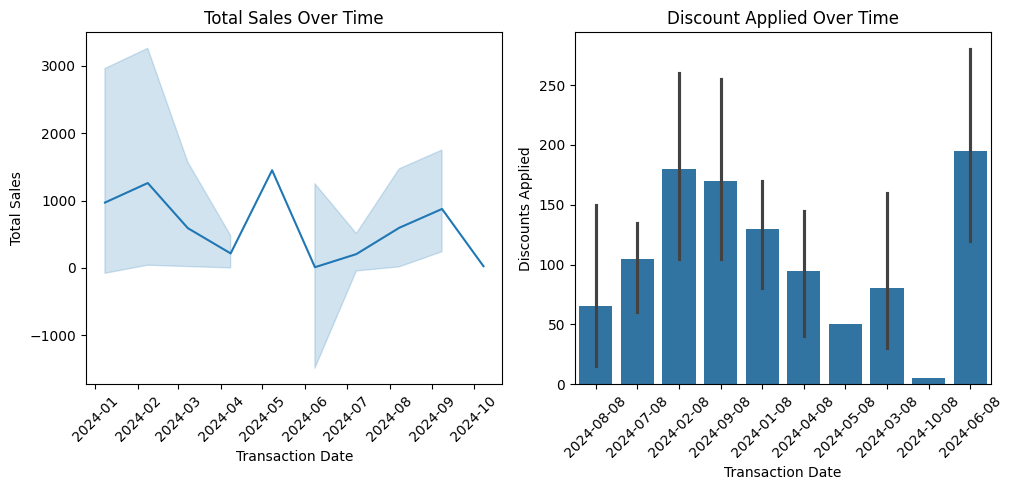

In [ ]:
plt.figure(figsize=(15, 5))

# First subplot: Line plot for Total sales over time
plt.subplot(1, 3, 1)
sns.lineplot(x=df['TransactionDate'].dt.date, y='TotalAmount_Calculated', data=df, estimator=sum)
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)

# Second subplot: Bar plot for Total Amount over time
plt.subplot(1, 3, 2)
sns.barplot(x=df['TransactionDate'].dt.date, y='DiscountApplied', data=df, estimator=sum)
plt.xlabel('Transaction Date')
plt.ylabel('Discounts Applied')
plt.title('Discount Applied Over Time')
plt.xticks(rotation=45)

plt.tight_layout()

# **Customer Analysis**
**Projection :** Average spend per customer, total discounts received by each customer.

**Purpose :** To understand customer behavior, spending patterns, and segmentation.

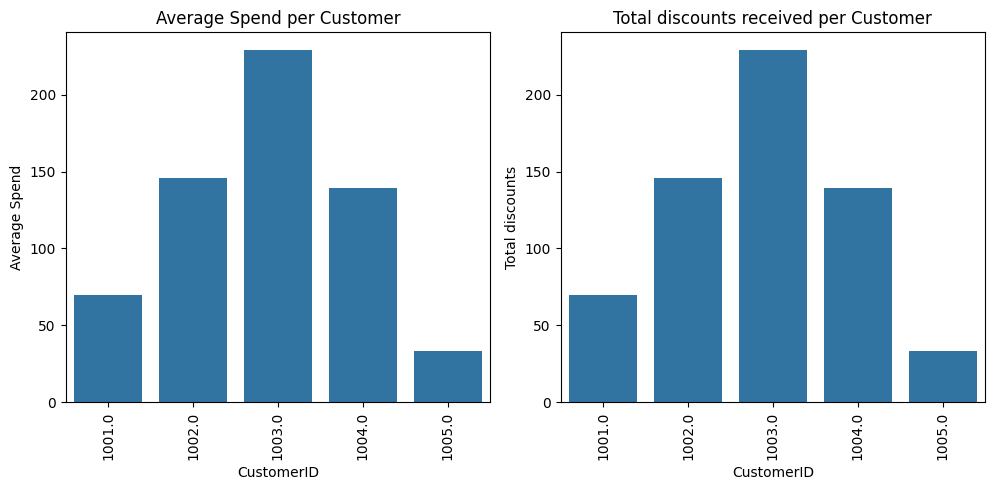

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
avg_spend_per_customer = df.groupby('CustomerID')['TotalAmount_Calculated'].mean()
sns.barplot(x=avg_spend_per_customer.index, y=avg_spend_per_customer.values)
plt.title('Average Spend per Customer')
plt.xlabel('CustomerID')
plt.ylabel('Average Spend')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
avg_discount_per_customer = df.groupby('CustomerID')['DiscountApplied'].sum()
sns.barplot(x=avg_spend_per_customer.index, y=avg_spend_per_customer.values)
plt.title('Total discounts received per Customer')
plt.xlabel('CustomerID')
plt.ylabel('Total discounts')
plt.xticks(rotation=90)

plt.tight_layout()

**Insights :**

1003 has purchased or spent most of the money and received highest discounts compared to other customers.

# **Product Analysis**

**Projection :** Total sales by product category, average price per unit by category, total units sold by product.

**Purpose :** To determine the best-selling products and categories.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Electronics'),
  Text(1, 0, 'Fashion'),
  Text(2, 0, 'Grocery'),
  Text(3, 0, 'Home Decor'),
  Text(4, 0, 'Toys')])

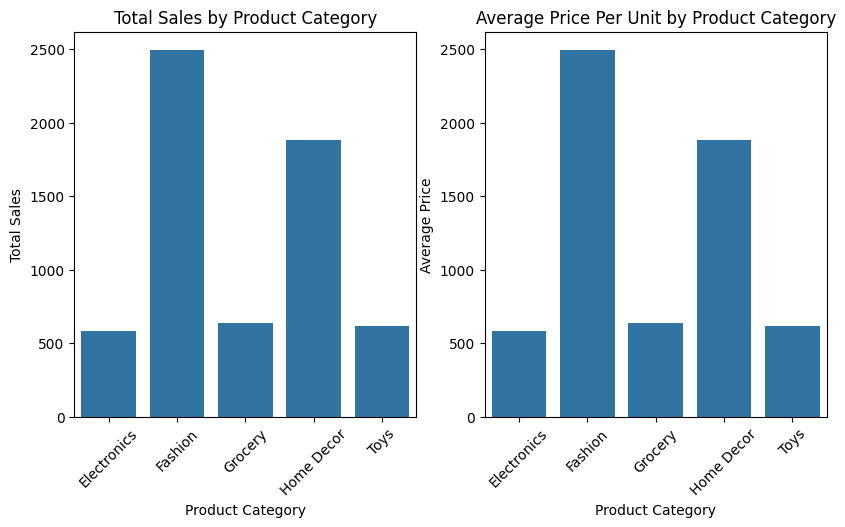

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sales_by_category = df.groupby('ProductCategory')['TotalAmount_Calculated'].sum()
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)


plt.subplot(1, 3, 2)
avg_price_by_category = df.groupby('ProductCategory')['TotalAmount_Calculated'].mean()
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Average Price Per Unit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

**Insights :**  

Fashion has highest sales and highest average salary followed by Home Decor.

# **Payment Method Analysis**

Text(0, 0.5, 'Number of Transactions')

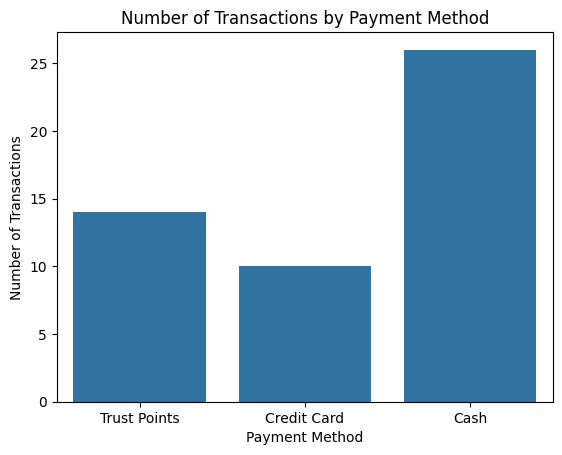

In [ ]:
sns.countplot(x=df['PaymentMethod'])
plt.title('Number of Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')

**Insights :**

Most of the customers prefer cash compared to other payment methods.

Text(0.5, 1.0, 'Correlation Matrix')

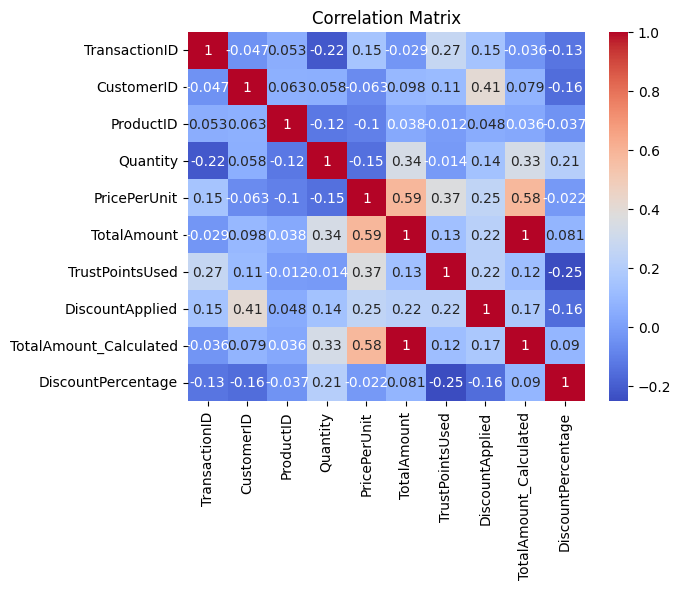

In [ ]:
#Correlation Heatmap
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


**Insights :**

**Quantity vs. TotalAmount (0.34) :** There is a moderate positive correlation between the quantity of items purchased and the total amount spent, which makes sense since buying more items typically increases the total cost.


**PricePerUnit vs. TotalAmount_Calculated (0.58) :** Similarly, there is a strong positive correlation between PricePerUnit and TotalAmount_Calculated.

**DiscountApplied vs. TotalAmount (0.22) :** A low positive correlation, suggesting that higher discounts slightly increase the total amount, potentially due to customers buying more when discounts are applied.

**Linearity :**

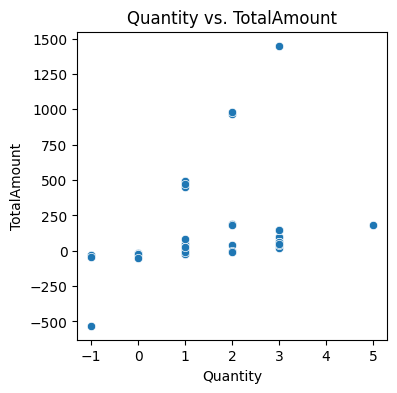

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=df['Quantity'], y=df['TotalAmount_Calculated'])
plt.title('Quantity vs. TotalAmount')
plt.xlabel('Quantity')
plt.ylabel('TotalAmount')
plt.show()

**Insights :**

1.The data points do not appear to follow a straight line or a clear linear pattern.

2.There seems to be a non-linear relationship between Quantity and TotalAmount. Some points are widely dispersed, and there is a lack of consistent trend.